# Exploratory Data Analysis on Glassdoor Jobs using Python



<img src="https://i.imgur.com/oRm12sU.png" alt="Image" width="1200" height="600">


<img src="https://i.imgur.com/IPObTAk.png" alt="Image" width="1200" height="600">


### Outline of the project

- First, we'll define the project goal, which is to provide valuable insights for job seekers and employers in the data science job market.

- Next, we'll download the [Glassdoor](https://www.kaggle.com/datasets/andresionek/data-jobs-listings-glassdoor) dataset from Kaggle to use as our data source.

- Next, we'll proceed with data preparation and cleaning, which is crucial for ensuring the quality and reliability of our analysis. This step involves handling missing data, dealing with outliers, performing data transformation to meet our requirements, and addressing inconsistent or erroneous data. By conducting these tasks, we can enhance the accuracy and reliability of our insights and analysis.

- Next, we'll delve into Exploratory Data Analysis (EDA) and Visualization, utilizing a range of techniques to thoroughly explore the data and unveil meaningful patterns and trends. Through the power of visualizations, we'll gain insights into various aspects of the dataset, such as company ratings, employee sizes, salary distributions, sector analysis, and more. These visualizations will help us effectively communicate our findings and enhance the overall understanding of the data.

- Finally, to accomplish our project goal, we will formulate pertinent questions based on the data and employ analytical techniques to answer them. By asking insightful questions and conducting data-driven analysis, we aim to gain valuable insights into the data science job market. These insights will aid job seekers in making informed career decisions and assist employers in developing effective recruitment strategies. Ultimately, our project will provide actionable information that contributes to a better understanding of the data science job market landscape.

### Introduction

The data science job market is a growing and dynamic field. In recent years, there has been a surge in demand for data scientists, with salaries for these roles rising accordingly. This trend is expected to continue in the coming years, as businesses increasingly rely on data to make decisions.

In this exploratory data analysis (EDA) project, we aim to investigate and gain insights into the data science job market. We will use a dataset of job postings from Glassdoor, a popular online job search platform. Our primary focus is to analyze the trends and characteristics of the job market for data science-related roles in different countries and industries.

Through this project, we hope to answer important questions such as:

  •  What are the top job titles and industries in  the data science job market?

  • Which countries have the most job opportunities for data science roles?


  • What are the required skills and qualifications for data science positions?

  • Which job sources are the most popular for data science job postings?

By answering these questions, we can help job seekers and employers better understand the current state of the data science job market, and provide valuable insights for career planning and recruitment strategies.

We will use Python and various data analysis tools and techniques to explore the Glassdoor dataset, including data cleaning, visualization, and statistical analysis. Throughout the project, we will document our approach and findings to provide a clear and comprehensive understanding of the dataset and our analysis.






### About the data

In this analysis we will use the 'Data Jobs Listings - Glassdoor' dataset by Andre Sionek on [Kaggle](https://www.kaggle.com/datasets/andresionek/data-jobs-listings-glassdoor).

We will be using two .csv files:

- glassdoor.csv

- glassdoor_salary_salaries.csv

The glassdoor.csv contains 165k rows and 163 columns but we will be using 
only 16 columns which are enough to answer our questions and reach the end goal of  our project.


The 16 columns from `glassdoor.csv` which we will be using are:

1. `gaTrackerData.empName`: The name of the company in the job listing.

2. `gaTrackerData.empSize`: Total number of empoyees in the company, in this dataset the employee count not a particular number rather it's range like 1 to 10 and so on.

3. `gaTrackerData.expired`: This column shows if the company is still around or it's been closed.

4. `gaTrackerData.industry`: In which Category of Industry the Company falls in.

5. `gaTrackerData.jobTitle`: The Job Title for which the job has been listed.

6. `gaTrackerData.location`: The City where the Company is Situated in.

7. `gaTrackerData.sector`: In which Category of Sector the Company falls in.

8. `header.posted`: The date on which the job was listed.

9.  `header.rating`: The Company rating.

10. `job.description` : The description of the job listed.

11. `job.jobSource` : On which platform the job was listed.

12. `ap.country`: The Country where the Company is Situated in.

13. `map.lat` : Latitude of the Country.

14. `map.lng` : Longitutde of the Country.

15. `overview.foundedYear`: The year in which the Company was founded.

16. `overview.revenue` : Total Revenue of the Company.


The `glassdoor_salary_salaries.csv` contains 400k rows and 9 columns where the salary of different Job Titles is shown accross different columns based on percentile.

Here there are multiple salaries of same Job Title so we'll have to figure out a way to use that as per our need.


## Installing Packages

First we'll install and import all the necessary libraries for the analysis.

In [1]:
!pip install opendatasets pandas regex numpy plotly matplotlib --quiet

In [2]:
# Import library to download dataset from kaggle
import opendatasets as od

# Import library for interacting with operating system
import os

# Import data analysis and visualization libraries
import pandas as pd
import regex as re
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

sns.set_style("darkgrid")

## Download the dataset

Then we need to download dataset from kaggle for which we'll need kaggle `username` and `access token`.


In [3]:
dataset_url = 'https://www.kaggle.com/datasets/andresionek/data-jobs-listings-glassdoor'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedfaizanshafi
Your Kaggle Key: ··········


100%|██████████| 452M/452M [00:05<00:00, 84.2MB/s]


The `urlretrieve` function provided by the urllib.request module in Python's standard library. It is used to retrieve data from a URL and save it to a local file.

In [4]:
urlretrieve('https://www.kaggle.com/datasets/andresionek/data-jobs-listings-glassdoor', 'glassdoor.csv' )

('glassdoor.csv', <http.client.HTTPMessage at 0x7f17f7ae6980>)

Saving the files in `data_dir`.

In [5]:
data_dir ='data-jobs-listings-glassdoor'

We can check if the data has been downloaded or not using `os.listdir`.

In [6]:
os.listdir(data_dir)

['glassdoor_breadCrumbs.csv',
 'glassdoor_benefits_comments.csv',
 'glassdoor_photos.csv',
 'glassdoor_wwfu_val_photos.csv',
 'glassdoor_wwfu_val_videos.csv',
 'country_names_2_digit_codes.csv',
 'glassdoor_overview_competitors.csv',
 'glassdoor_wwfu_val_captions.csv',
 'glassdoor_wwfu.csv',
 'glassdoor_reviews.csv',
 'glassdoor_reviews_val_reviewResponses.csv',
 'glassdoor_benefits_highlights.csv',
 'glassdoor.csv',
 'currency_exchange.csv',
 'glassdoor_salary_salaries.csv']

We will be using only `glassdoor.csv'` and `glassdoor_salary_salaries.csv'` for our analysis.

## Data Preparation and Cleaning

Data preparation and cleaning are crucial steps in the data analysis process. They involve transforming and cleaning the raw data to ensure its quality, consistency, and suitability for analysis.The key steps involved in data preparation and cleaning:



- Handling Missing data
- Dealing with Outliers
- Data Transformation
- Handling Inconsistent or Erroneous Data



In [7]:
df = pd.read_csv('data-jobs-listings-glassdoor/glassdoor.csv')

In [8]:
df

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,...,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
0,0.000000,2801.0,2801.0,0,NaN,2801,-1,2183810,Modus Group,501-1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2483.0,NaN
1,4.000000,2802.0,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-14T06:05:58,2484.0,NaN
2,0.000000,2803.0,2803.0,0,NaN,2803,-1,1043373,Immobiliare.it,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.0,NaN
3,0.000000,2804.0,2804.0,0,NaN,2804,-1,2226886,Codup,1-50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2486.0,NaN
4,0.000000,2805.0,2805.0,0,NaN,2805,-1,851555,Markelytics Solutions,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2487.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165285,0.000000,58396.0,58396.0,0,NaN,58396,-1,414579,Valiram Group,1001-5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52075.0,NaN
165286,3.941176,58397.0,58397.0,34,NaN,58397,-1,1519,Intel Corporation,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-30T06:24:28,52076.0,NaN
165287,0.000000,58398.0,58398.0,0,NaN,58398,-1,1065492,Mc Three,-1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52077.0,NaN
165288,0.000000,58399.0,58399.0,0,NaN,58399,-1,595052,Hanzehogeschool Groningen,1001-5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52078.0,NaN


As we can see there are totally 165k rows and 163 columns in `glassdoor.csv`.

In [9]:
raw_df = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()


For safer side we'll make a copy of dataset so that the orginal dataset is'nt altered and remove the duplicate colums.

In [10]:
raw_df

,benefits.benefitRatingDecimal,benefits.comments,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.expired,...,salary.country.type,salary.currency.currencyCode,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
0,0.000000,2801.0,0,NaN,2801,-1,2183810,Modus Group,501-1000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2483.0,NaN
1,4.000000,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,False,...,N,GBP,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$#,&pound;,2019-10-14T06:05:58,2484.0,NaN
2,0.000000,2803.0,0,NaN,2803,-1,1043373,Immobiliare.it,201-500,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.0,NaN
3,0.000000,2804.0,0,NaN,2804,-1,2226886,Codup,1-50,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2486.0,NaN
4,0.000000,2805.0,0,NaN,2805,-1,851555,Markelytics Solutions,201-500,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2487.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165285,0.000000,58396.0,0,NaN,58396,-1,414579,Valiram Group,1001-5000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52075.0,NaN
165286,3.941176,58397.0,34,NaN,58397,-1,1519,Intel Corporation,10000--1,False,...,N,GBP,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$#,&pound;,2019-10-30T06:24:28,52076.0,NaN
165287,0.000000,58398.0,0,NaN,58398,-1,1065492,Mc Three,-1-0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52077.0,NaN
165288,0.000000,58399.0,0,NaN,58399,-1,595052,Hanzehogeschool Groningen,1001-5000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52078.0,NaN


The number of columns has been reduced to 120, which was 163 earlier.

Now we'll select the desired columns for our analysis.

In [11]:
selected_col = [ 'gaTrackerData.empName', 'gaTrackerData.empSize', 'gaTrackerData.expired', 'gaTrackerData.industry', 'gaTrackerData.jobTitle', 'gaTrackerData.location', 'gaTrackerData.sector', 'header.posted', 'header.rating',  'job.description','job.jobSource', 'map.country', 'map.lat', 'map.lng', 'overview.foundedYear', 'overview.revenue']

In [12]:
len(selected_col)

16

In [13]:
glassdoor_df = raw_df[selected_col]

Finally we'll be using `glassdoor_df` for our analysis which contains 165k rows and 16 columns.

In [14]:
glassdoor_df

,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.expired,gaTrackerData.industry,gaTrackerData.jobTitle,gaTrackerData.location,gaTrackerData.sector,header.posted,header.rating,job.description,job.jobSource,map.country,map.lat,map.lng,overview.foundedYear,overview.revenue
0,Modus Group,501-1000,False,Investment Banking & Asset Management,Biogas Project Development Manager,Warsaw,Finance,"Oct 24, 2019",-0.1,We are the drivers of the future who offer a g...,WorkableHR.com,Poland,52.2500,21.0000,1993,Unknown / Non-Applicable
1,Boehringer Ingelheim,10000--1,False,Biotech & Pharmaceuticals,Quality Manager - Boehringer Ingelheim Healthc...,NaN,Biotech & Pharmaceuticals,"Nov 4, 2019",3.8,<strong></strong>\n<br/><br/>\n<strong></stron...,taleo,NaN,41.1500,-8.6167,1885,£5 to £10 billion (GBP)
2,Immobiliare.it,201-500,False,NaN,"Senior Software Engineer (PHP, Elixir, Python)",Milano,NaN,"Oct 28, 2019",2.4,Dottori.it &egrave; il motore di ricerca che t...,Indeed XML Feed Employer,Italy,45.4667,9.2000,0,£25 to £50 million (GBP)
3,Codup,1-50,False,NaN,Senior SQA Engineer,Karachi,NaN,"Nov 4, 2019",1.5,Codup is looking for a Senior SQA Engineer for...,Indeed XML Feed Dradis,PK,24.8667,67.0500,0,Unknown / Non-Applicable
4,Markelytics Solutions,201-500,False,Consulting,Research Manager,Bengaluru,Business Services,"Nov 1, 2019",3.5,<strong>Department:</strong> Research &amp; Op...,Indeed XML Feed Employer,IN,12.9670,77.5873,2003,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165285,Valiram Group,1001-5000,False,"Department, Clothing, & Shoe Stores",East – Assistant Store Manager (All Brands),NaN,Retail,"Nov 6, 2019",2.0,<strong>Responsibilities</strong>\n\n<ul>\n<li...,CustomCrawl,NaN,0.0000,0.0000,1935,£2 to £5 billion (GBP)
165286,Intel Corporation,10000--1,False,Computer Hardware & Software,Data Center Partner Marketing Manager (Japan),Tokyo,Information Technology,"Nov 10, 2019",4.0,<strong>Job Description</strong><br/><br/>Make...,Employer Feed,JP,35.6850,139.7514,1968,£5 to £10 billion (GBP)
165287,Mc Three,-1-0,False,NaN,Junior Production Manager m/v,Waregem,NaN,"Oct 15, 2019",5.0,Functie\n<br/>\nJe ondersteunt de productiever...,Indeed XML Feed Employer,BE,50.8833,3.4167,1989,£100 to £500 million (GBP)
165288,Hanzehogeschool Groningen,1001-5000,False,Colleges & Universities,Opleidingsmanager Industrieel Product Ontwerpen,Groningen,Education,"Oct 31, 2019",3.9,Het Instituut voor Engineering is &eacute;&eac...,Indeed XML Feed Employer,NL,53.2167,6.5500,1986,£10 to £25 million (GBP)


We'll change the columns names for easy readability.

In [15]:
glassdoor_df = glassdoor_df.rename(columns={'gaTrackerData.empName': 'Company_Name', 'gaTrackerData.empSize':'Employee_Size', 'gaTrackerData.expired':'Company_liqudated', 'gaTrackerData.industry':'Industry', 'gaTrackerData.jobTitle':'Job_Title', 'gaTrackerData.location':'Location',  'gaTrackerData.sector':'sector', 'header.posted':'Job_Posting_Date', 'header.rating':'Company_Rating',  'job.description':'Job_Description', 'job.jobSource':'Job_Source', 'map.country':'Country', 'map.lat':'Latitude', 'map.lng':'Longitude', 'overview.foundedYear':'Company_Founded_Year', 'overview.revenue':'Revenue'})

In [16]:
glassdoor_df

,Company_Name,Employee_Size,Company_liqudated,Industry,Job_Title,Location,sector,Job_Posting_Date,Company_Rating,Job_Description,Job_Source,Country,Latitude,Longitude,Company_Founded_Year,Revenue
0,Modus Group,501-1000,False,Investment Banking & Asset Management,Biogas Project Development Manager,Warsaw,Finance,"Oct 24, 2019",-0.1,We are the drivers of the future who offer a g...,WorkableHR.com,Poland,52.2500,21.0000,1993,Unknown / Non-Applicable
1,Boehringer Ingelheim,10000--1,False,Biotech & Pharmaceuticals,Quality Manager - Boehringer Ingelheim Healthc...,NaN,Biotech & Pharmaceuticals,"Nov 4, 2019",3.8,<strong></strong>\n<br/><br/>\n<strong></stron...,taleo,NaN,41.1500,-8.6167,1885,£5 to £10 billion (GBP)
2,Immobiliare.it,201-500,False,NaN,"Senior Software Engineer (PHP, Elixir, Python)",Milano,NaN,"Oct 28, 2019",2.4,Dottori.it &egrave; il motore di ricerca che t...,Indeed XML Feed Employer,Italy,45.4667,9.2000,0,£25 to £50 million (GBP)
3,Codup,1-50,False,NaN,Senior SQA Engineer,Karachi,NaN,"Nov 4, 2019",1.5,Codup is looking for a Senior SQA Engineer for...,Indeed XML Feed Dradis,PK,24.8667,67.0500,0,Unknown / Non-Applicable
4,Markelytics Solutions,201-500,False,Consulting,Research Manager,Bengaluru,Business Services,"Nov 1, 2019",3.5,<strong>Department:</strong> Research &amp; Op...,Indeed XML Feed Employer,IN,12.9670,77.5873,2003,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165285,Valiram Group,1001-5000,False,"Department, Clothing, & Shoe Stores",East – Assistant Store Manager (All Brands),NaN,Retail,"Nov 6, 2019",2.0,<strong>Responsibilities</strong>\n\n<ul>\n<li...,CustomCrawl,NaN,0.0000,0.0000,1935,£2 to £5 billion (GBP)
165286,Intel Corporation,10000--1,False,Computer Hardware & Software,Data Center Partner Marketing Manager (Japan),Tokyo,Information Technology,"Nov 10, 2019",4.0,<strong>Job Description</strong><br/><br/>Make...,Employer Feed,JP,35.6850,139.7514,1968,£5 to £10 billion (GBP)
165287,Mc Three,-1-0,False,NaN,Junior Production Manager m/v,Waregem,NaN,"Oct 15, 2019",5.0,Functie\n<br/>\nJe ondersteunt de productiever...,Indeed XML Feed Employer,BE,50.8833,3.4167,1989,£100 to £500 million (GBP)
165288,Hanzehogeschool Groningen,1001-5000,False,Colleges & Universities,Opleidingsmanager Industrieel Product Ontwerpen,Groningen,Education,"Oct 31, 2019",3.9,Het Instituut voor Engineering is &eacute;&eac...,Indeed XML Feed Employer,NL,53.2167,6.5500,1986,£10 to £25 million (GBP)


In [17]:
glassdoor_df.describe()

,Company_Rating,Latitude,Longitude,Company_Founded_Year
count,165290.000000,165290.000000,165290.000000,165290.000000
mean,2.956646,26.499080,29.642232,1273.873422
std,1.612910,26.013832,62.586654,942.425948
min,-0.100000,-77.850000,-171.983300,0.000000
25%,2.800000,2.922800,0.000000,0.000000
50%,3.600000,33.823400,12.133300,1947.000000
75%,4.000000,48.866700,77.587300,1998.000000
max,5.000000,67.183300,177.366700,2019.000000


`describe()` computes and displays descriptive statistics of the DataFrame and summary of the central tendency, dispersion, and shape of the distribution of a dataset.

In [18]:
# To check which columns contains numerical values

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = glassdoor_df.select_dtypes(include=numerics)

len(numeric_df.columns)

4

There are 4 numeric columns in our Data Frame.


Percentage of missing values per column

In [19]:
missing_percentages = glassdoor_df.isna().sum().sort_values(ascending=False) / len(glassdoor_df) * 100
missing_percentages[missing_percentages > 0]

Location           42.521024
Country            30.266804
Industry           28.679896
sector             28.660536
Company_Name       11.016395
Employee_Size      11.016395
Revenue            11.016395
Job_Description     0.002420
dtype: float64

The above numbers shows the percentage of values missing in each column.


We'll plot a simple bar graph to demonstrate the missing values.

Text(0.5, 1.0, 'Missing percentages of each column')

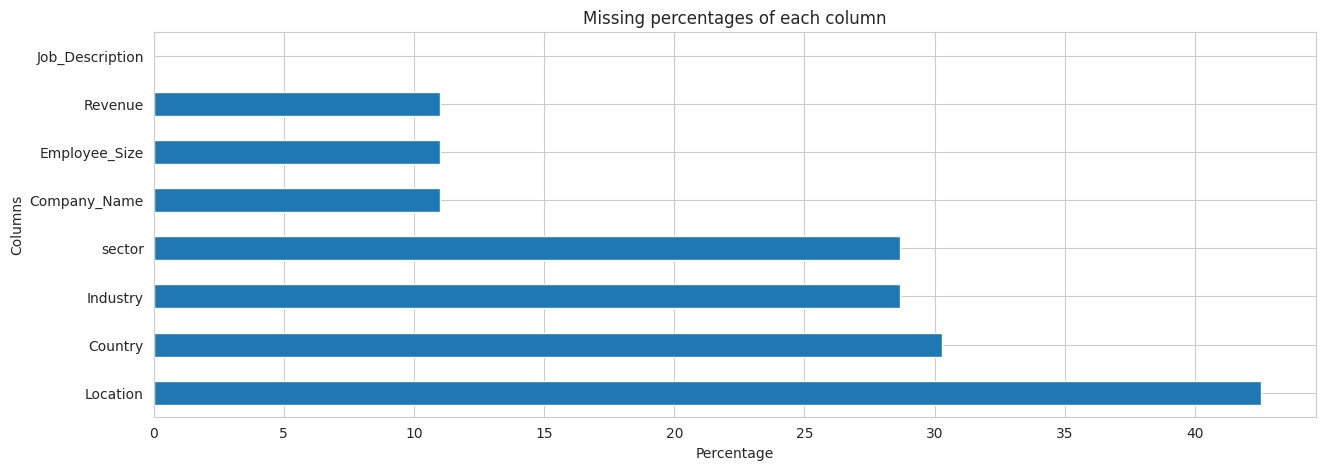

In [101]:
missing_percentages[missing_percentages > 0].plot(kind = 'barh');

# Add a label for the x-axis 
plt.xlabel('Percentage')

# Add a label for the y-axis 
plt.ylabel('Columns')

# Add a title to the plot 
plt.title('Missing percentages of each column')

As we can see `Industry` and `sector` has the most number of missing values.

Handling missing data

In [21]:
glassdoor_df.dropna(subset=['Country'], inplace=True)

Droping NaN countries

In [22]:
glassdoor_df['Country'].head()

0    Poland
2     Italy
3        PK
4        IN
6        IL
Name: Country, dtype: object

Initially Glassdoor dataset length was 165290 job listings.
After removing NaN countries we were left with 115262 job listings

 As we can see, we have some country names writen in full form, others are 2 digits codes.
Let's fix that by replacing 2 digits country codes by the full country name.

 This table has a list of country names vs 2 digit codes.

In [23]:
country_codes = pd.read_csv('data-jobs-listings-glassdoor/country_names_2_digit_codes.csv')


In [24]:
country_codes.head()

,Name,Code
0,Afghanistan,AF
1,Ã…land Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


 We merge `glassdoor_df` and `country_codes` by 2 digit code, and then fill the NaNs with the full country name.

In [25]:
glassdoor_df = pd.merge(glassdoor_df, country_codes, left_on='Country', right_on='Code', how='left')

Here we'll just reindex the columns.

In [26]:
glassdoor_df = glassdoor_df.reindex(columns = [ 'Company_Name','Country','Name','Code', 'Employee_Size', 'Company_liqudated',
        'Industry','sector' ,'Location','Job_Title','Job_Description',
         'Job_Posting_Date','Job_Source','Company_Rating','Company_Founded_Year', 'Revenue',
         'Latitude', 'Longitude'])

In [27]:
glassdoor_df.head()

,Company_Name,Country,Name,Code,Employee_Size,Company_liqudated,Industry,sector,Location,Job_Title,Job_Description,Job_Posting_Date,Job_Source,Company_Rating,Company_Founded_Year,Revenue,Latitude,Longitude
0,Modus Group,Poland,NaN,NaN,501-1000,False,Investment Banking & Asset Management,Finance,Warsaw,Biogas Project Development Manager,We are the drivers of the future who offer a g...,"Oct 24, 2019",WorkableHR.com,-0.1,1993,Unknown / Non-Applicable,52.2500,21.0000
1,Immobiliare.it,Italy,NaN,NaN,201-500,False,NaN,NaN,Milano,"Senior Software Engineer (PHP, Elixir, Python)",Dottori.it &egrave; il motore di ricerca che t...,"Oct 28, 2019",Indeed XML Feed Employer,2.4,0,£25 to £50 million (GBP),45.4667,9.2000
2,Codup,PK,Pakistan,PK,1-50,False,NaN,NaN,Karachi,Senior SQA Engineer,Codup is looking for a Senior SQA Engineer for...,"Nov 4, 2019",Indeed XML Feed Dradis,1.5,0,Unknown / Non-Applicable,24.8667,67.0500
3,Markelytics Solutions,IN,India,IN,201-500,False,Consulting,Business Services,Bengaluru,Research Manager,<strong>Department:</strong> Research &amp; Op...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,2003,Unknown / Non-Applicable,12.9670,77.5873
4,Nisha Group,IL,Israel,IL,51-200,False,Staffing & Outsourcing,Business Services,NaN,B2B Product Manager,<b>&#1514;&#1497;&#1488;&#1493;&#1512; &#1492;...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,0,Unknown / Non-Applicable,0.0000,0.0000


Then replace the 2 digits codes with full name.

In [28]:
glassdoor_df.Country = glassdoor_df.Name.fillna(glassdoor_df.Country)

In [29]:
glassdoor_df.head()

,Company_Name,Country,Name,Code,Employee_Size,Company_liqudated,Industry,sector,Location,Job_Title,Job_Description,Job_Posting_Date,Job_Source,Company_Rating,Company_Founded_Year,Revenue,Latitude,Longitude
0,Modus Group,Poland,NaN,NaN,501-1000,False,Investment Banking & Asset Management,Finance,Warsaw,Biogas Project Development Manager,We are the drivers of the future who offer a g...,"Oct 24, 2019",WorkableHR.com,-0.1,1993,Unknown / Non-Applicable,52.2500,21.0000
1,Immobiliare.it,Italy,NaN,NaN,201-500,False,NaN,NaN,Milano,"Senior Software Engineer (PHP, Elixir, Python)",Dottori.it &egrave; il motore di ricerca che t...,"Oct 28, 2019",Indeed XML Feed Employer,2.4,0,£25 to £50 million (GBP),45.4667,9.2000
2,Codup,Pakistan,Pakistan,PK,1-50,False,NaN,NaN,Karachi,Senior SQA Engineer,Codup is looking for a Senior SQA Engineer for...,"Nov 4, 2019",Indeed XML Feed Dradis,1.5,0,Unknown / Non-Applicable,24.8667,67.0500
3,Markelytics Solutions,India,India,IN,201-500,False,Consulting,Business Services,Bengaluru,Research Manager,<strong>Department:</strong> Research &amp; Op...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,2003,Unknown / Non-Applicable,12.9670,77.5873
4,Nisha Group,Israel,Israel,IL,51-200,False,Staffing & Outsourcing,Business Services,NaN,B2B Product Manager,<b>&#1514;&#1497;&#1488;&#1493;&#1512; &#1492;...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,0,Unknown / Non-Applicable,0.0000,0.0000


 Dropping columns `Name` and `Code`.


In [30]:
glassdoor_df = glassdoor_df.drop(['Name', 'Code'], axis=1)

In [31]:
glassdoor_df.Country.isna().sum()

0

There are no missing values in `Country` column.

In [32]:
listings_before = glassdoor_df.shape[0]

In [33]:
listings_before

115262

After doing this, there were still some countries that didn't match official nomenclature, we need to remove them.

Again we merge `glassdoor_df` and `country_codes` to remove NaN.

In [34]:
glassdoor_df = pd.merge(glassdoor_df, country_codes, left_on='Country', right_on='Name', how='left')

In [35]:
glassdoor_df.head()

,Company_Name,Country,Employee_Size,Company_liqudated,Industry,sector,Location,Job_Title,Job_Description,Job_Posting_Date,Job_Source,Company_Rating,Company_Founded_Year,Revenue,Latitude,Longitude,Name,Code
0,Modus Group,Poland,501-1000,False,Investment Banking & Asset Management,Finance,Warsaw,Biogas Project Development Manager,We are the drivers of the future who offer a g...,"Oct 24, 2019",WorkableHR.com,-0.1,1993,Unknown / Non-Applicable,52.2500,21.0000,Poland,PL
1,Immobiliare.it,Italy,201-500,False,NaN,NaN,Milano,"Senior Software Engineer (PHP, Elixir, Python)",Dottori.it &egrave; il motore di ricerca che t...,"Oct 28, 2019",Indeed XML Feed Employer,2.4,0,£25 to £50 million (GBP),45.4667,9.2000,Italy,IT
2,Codup,Pakistan,1-50,False,NaN,NaN,Karachi,Senior SQA Engineer,Codup is looking for a Senior SQA Engineer for...,"Nov 4, 2019",Indeed XML Feed Dradis,1.5,0,Unknown / Non-Applicable,24.8667,67.0500,Pakistan,PK
3,Markelytics Solutions,India,201-500,False,Consulting,Business Services,Bengaluru,Research Manager,<strong>Department:</strong> Research &amp; Op...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,2003,Unknown / Non-Applicable,12.9670,77.5873,India,IN
4,Nisha Group,Israel,51-200,False,Staffing & Outsourcing,Business Services,NaN,B2B Product Manager,<b>&#1514;&#1497;&#1488;&#1493;&#1512; &#1492;...,"Nov 1, 2019",Indeed XML Feed Employer,3.5,0,Unknown / Non-Applicable,0.0000,0.0000,Israel,IL


In [36]:
glassdoor_df.dropna(subset=['Name'], inplace=True)


In [37]:
glassdoor_df = glassdoor_df.drop(['Name', 'Code'], axis=1)

In [38]:
len(glassdoor_df)

109555

After removing countries names that doesn't match official nomenclature therewere 109555 job listings left.

In [39]:
glassdoor_df.Company_Rating.value_counts()

 0.00    15198
-0.10    14181
 3.80     9873
 4.00     7254
 3.60     5489
         ...  
 3.52        1
 2.69        1
 4.75        1
 4.07        1
 4.55        1
Name: Company_Rating, Length: 166, dtype: int64

There are few negative ratings therefore we'll change all the negative ratings to zero.

In [40]:
glassdoor_df['Company_Rating'][glassdoor_df['Company_Rating'] < 0] = 0


<ipython-input-40-fe268a27642b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glassdoor_df['Company_Rating'][glassdoor_df['Company_Rating'] < 0] = 0


In [41]:
glassdoor = glassdoor_df.copy()

Let's just create a copy of `glassdoor_df`.

Now we'll focus on `Job_Title`.


In [42]:
glassdoor.Job_Title.value_counts()

Project Manager                                         3201
Software Engineer                                       2293
Business Analyst                                        1719
Product Manager                                         1507
Data Scientist                                          1396
                                                        ... 
Backend Engineer (Infrastructure)                          1
Dynamics NAV Techno-Functional Consultant                  1
Customer Support Engineer Tier 1                           1
Junior Data Analyst - Periscope, Marketing and Sales       1
BIO MASS SCIENTIST / RESEARCHERS                           1
Name: Job_Title, Length: 44719, dtype: int64

Here we'll be taking only the popular job titles for the further analysis.

In [43]:
job_titles = ['Software Engineer','Full Stack Developer','Front-End Developer','Back-End Developer','Software Developer in Test','Cloud Developer','Mobile Developer','Web Developer','Software Architect','Technical Lead','Software Development Manager','Software Project Manager','Software Product Manager','Agile','DevOps Engineer','QA Engineer','Systems Engineer','Network Engineer','Security Engineer','Database Administrator','Big Data Engineer','Data Engineer','Data Analyst','Data Scientist','Machine Learning Engineer','Business Intelligence Analyst','Data Administrator','Data Mining Engineer','Data Modeler','Data Governance Analyst','Data Visualization Analyst','Predictive Modeler','Statistical Modeler','Data Product Manager','Data Consultant','Data Quality Engineer','Data Wrangler','Data Storyteller','Data Infrastructure Engineer','Data Architect','AI Engineer', 'Artificial Intelligence Engineer','research scientist', 'business analyst','Business Intelligence Developer' , 'statistician', 'Full Stack Machine Learning Engineer', 'deep learning engineer', 'Full Stack Deep Learning Engineer']

 We'll filter the glassdoor DataFrame based on a list of job titles, extract the matched job titles, and format them to title case, resulting in a modified DataFrame with the filtered and processed job titles.

In [44]:
job_masks = [glassdoor.Job_Title.str.contains(job_title, flags=re.IGNORECASE, regex=True) for job_title in job_titles]
combined_mask = np.vstack(job_masks).any(axis=0)
glassdoor = glassdoor[combined_mask].reset_index(drop=True)
job_titles_regex = '|'.join(job_titles)
glassdoor.Job_Title = glassdoor.Job_Title.str.findall(job_titles_regex, flags=re.IGNORECASE)
glassdoor.Job_Title = glassdoor.Job_Title.str[0]
glassdoor.Job_Title = glassdoor.Job_Title.str.title()

In [45]:
glassdoor.Job_Title.unique()

array(['Software Engineer', 'Qa Engineer', 'Data Analyst',
       'Business Analyst', 'Data Scientist',
       'Business Intelligence Analyst', 'Data Engineer',
       'Full Stack Machine Learning Engineer', 'Software Product Manager',
       'Big Data Engineer', 'Database Administrator', 'Devops Engineer',
       'Machine Learning Engineer', 'Systems Engineer',
       'Research Scientist', 'Mobile Developer', 'Data Modeler',
       'Data Architect', 'Agile', 'Statistician', 'Ai Engineer',
       'Network Engineer', 'Security Engineer',
       'Software Development Manager', 'Software Architect',
       'Data Infrastructure Engineer', 'Software Developer In Test',
       'Data Consultant', 'Software Project Manager', 'Technical Lead',
       'Web Developer', 'Data Product Manager', 'Deep Learning Engineer',
       'Business Intelligence Developer', 'Data Visualization Analyst',
       'Data Wrangler', 'Data Governance Analyst',
       'Artificial Intelligence Engineer', 'Full Stack Dev

Now we'll convert the `Job_Title` column into categorical column in Pandas by changing its data type.

In [46]:
glassdoor.Job_Title = glassdoor.Job_Title.astype('category')

In [47]:
glassdoor.Job_Title

0        Software Engineer
1              Qa Engineer
2             Data Analyst
3         Business Analyst
4           Data Scientist
               ...        
36024       Data Scientist
36025    Software Engineer
36026         Data Analyst
36027     Business Analyst
36028        Data Engineer
Name: Job_Title, Length: 36029, dtype: category
Categories (44, object): ['Agile', 'Ai Engineer', 'Artificial Intelligence Engineer',
                          'Back-End Developer', ..., 'Statistician', 'Systems Engineer', 'Technical Lead',
                          'Web Developer']

While there's no visible change, the conversion allows Pandas to optimize the storage & querying for the column by representing each category internally using a numeric code.

We can view the codes for each row as follows:



In [48]:
glassdoor.Job_Title.cat.codes

0        36
1        30
2        10
3         5
4        19
         ..
36024    19
36025    36
36026    10
36027     5
36028    13
Length: 36029, dtype: int8

The category code is the index of the category in the following list:

In [49]:
glassdoor.Job_Title.cat.categories

Index(['Agile', 'Ai Engineer', 'Artificial Intelligence Engineer',
       'Back-End Developer', 'Big Data Engineer', 'Business Analyst',
       'Business Intelligence Analyst', 'Business Intelligence Developer',
       'Cloud Developer', 'Data Administrator', 'Data Analyst',
       'Data Architect', 'Data Consultant', 'Data Engineer',
       'Data Governance Analyst', 'Data Infrastructure Engineer',
       'Data Modeler', 'Data Product Manager', 'Data Quality Engineer',
       'Data Scientist', 'Data Visualization Analyst', 'Data Wrangler',
       'Database Administrator', 'Deep Learning Engineer', 'Devops Engineer',
       'Full Stack Developer', 'Full Stack Machine Learning Engineer',
       'Machine Learning Engineer', 'Mobile Developer', 'Network Engineer',
       'Qa Engineer', 'Research Scientist', 'Security Engineer',
       'Software Architect', 'Software Developer In Test',
       'Software Development Manager', 'Software Engineer',
       'Software Product Manager', 'Software

Similarly converting `Country` column into Categorical datatype.

In [50]:
glassdoor.Country

0                 Italy
1              Pakistan
2               Belgium
3                France
4        United Kingdom
              ...      
36024       Philippines
36025       Netherlands
36026     United States
36027       Philippines
36028           Austria
Name: Country, Length: 36029, dtype: object

In [51]:
glassdoor.Country = glassdoor.Country.astype('category')

In [52]:
glassdoor.Country.unique()

['Italy', 'Pakistan', 'Belgium', 'France', 'United Kingdom', ..., 'Uganda', 'Nicaragua', 'Nepal', 'Macedonia, the Former Yugoslav Republic of', 'Iraq']
Length: 97
Categories (97, object): ['Afghanistan', 'Argentina', 'Armenia', 'Australia', ..., 'Uruguay',
                          'Uzbekistan', 'Viet Nam', 'Zimbabwe']

The `Employee_size` consits of these unique values. 

In [53]:
glassdoor.Employee_Size.unique()

array(['201-500', '1-50', '5001-10000', '10000--1', '51-200', nan,
       '501-1000', '-1-0', '1001-5000'], dtype=object)

Here '10000--1' should be 10000+ and '-1-0' should be '1-0' so we'll replace that.

In [54]:
glassdoor['Employee_Size'] = glassdoor['Employee_Size'].replace({'10000--1': '10000+', '-1-0': '1-0'})


In [55]:
glassdoor.Employee_Size.unique()

array(['201-500', '1-50', '5001-10000', '10000+', '51-200', nan,
       '501-1000', '1-0', '1001-5000'], dtype=object)

In [56]:
jobs_by_countries = glassdoor.Country.value_counts()


we'll convert the `Job_Posting_Date` column to datetime format, by doing so we can perform various datetime operations and calculations on the dates, such as sorting, filtering, extracting specific components (e.g., day, month, year), or calculating time differences.

In [57]:
glassdoor['Job_Posting_Date'] = pd.to_datetime(glassdoor['Job_Posting_Date'])


Now let's do the same for the other csv file that we downloaded earlier whcih is `glassdoor_salary_salaries.csv`.

In [58]:
df_2 = pd.read_csv('data-jobs-listings-glassdoor/glassdoor_salary_salaries.csv')

In [59]:
df_2.describe() 

,id,index,salary.salaries.val.basePayCount,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50
count,408763.000000,338391.000000,338391.000000,3.383570e+05,3.383570e+05,189128.000000
mean,73719.788425,1.889702,18.338168,3.873597e+04,5.542606e+04,45731.047995
std,42477.347863,1.419535,51.733411,2.767320e+04,4.061467e+04,26186.095216
min,1.000000,0.000000,1.000000,1.150000e+00,1.250000e+00,4.540000
25%,36934.000000,1.000000,1.000000,2.424823e+04,3.108596e+04,28399.800000
50%,73767.000000,2.000000,3.000000,3.402011e+04,4.927740e+04,42390.660000
75%,110517.000000,3.000000,12.000000,4.910421e+04,7.358468e+04,61717.330000
max,147149.000000,4.000000,882.000000,6.266469e+06,6.748168e+06,244107.810000


In [60]:
df_2

,id,index,salary.salaries.val.basePayCount,salary.salaries.val.jobTitle,salary.salaries.val.payPeriod,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50,salary.salaries.val.salaryType
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,9.0,Advanced Consultant,ANNUAL,32257.68,41971.34,38713.25,employer
2,2,1.0,7.0,Consultant,ANNUAL,28855.30,74022.00,38602.20,employer
3,2,2.0,7.0,Software Engineer,ANNUAL,30377.86,38750.00,35032.53,employer
4,2,3.0,4.0,Project Manager,ANNUAL,38254.70,48675.67,45636.77,employer
...,...,...,...,...,...,...,...,...,...
408758,35670,0.0,1.0,Product Manager,ANNUAL,34265.47,37770.71,NaN,employer
408759,35670,1.0,1.0,Service Manager,ANNUAL,51916.31,56360.15,NaN,employer
408760,35670,2.0,1.0,IPC,ANNUAL,31247.73,33952.68,NaN,employer
408761,35670,3.0,1.0,Applications Engineer,ANNUAL,47339.83,51077.61,NaN,employer


This Data Frame contains 400k rows and 9 columns, where the columns are just the percentile of the actual salary and the Job Title.


In [61]:
salary_data = df_2.copy()

In [62]:
salary_data['average_salary'] = salary_data[['salary.salaries.val.salaryPercentileMap.payPercentile10', 'salary.salaries.val.salaryPercentileMap.payPercentile50', 'salary.salaries.val.salaryPercentileMap.payPercentile90']].mean(axis=1)


We'll calculate the average salary based on three columns in the salary_data DataFrame and assigns the result to a new column called 'average_salary'.

In [63]:
salary_data.drop(['salary.salaries.val.basePayCount','salary.salaries.val.salaryPercentileMap.payPercentile10', 'salary.salaries.val.salaryPercentileMap.payPercentile90', 'salary.salaries.val.salaryPercentileMap.payPercentile50','salary.salaries.val.salaryType'], axis=1, inplace = True)

In [64]:
salary_data = salary_data.rename(columns={'salary.salaries.val.payPeriod':'Pay_Period','salary.salaries.val.jobTitle':'Job_Title' ,'average_salary':'Average_Salary'})

We'll drop the percentile columns and rename the columns.

In [65]:
salary_data

,id,index,Job_Title,Pay_Period,Average_Salary
0,1,NaN,NaN,NaN,NaN
1,2,0.0,Advanced Consultant,ANNUAL,37647.423333
2,2,1.0,Consultant,ANNUAL,47159.833333
3,2,2.0,Software Engineer,ANNUAL,34720.130000
4,2,3.0,Project Manager,ANNUAL,44189.046667
...,...,...,...,...,...
408758,35670,0.0,Product Manager,ANNUAL,36018.090000
408759,35670,1.0,Service Manager,ANNUAL,54138.230000
408760,35670,2.0,IPC,ANNUAL,32600.205000
408761,35670,3.0,Applications Engineer,ANNUAL,49208.720000


In [66]:
salary_data.dropna(subset=['Average_Salary'], inplace = True)
salary_data.dropna(subset=['Job_Title'], inplace = True)

Dropping the rows which contains `NaN` values.

In [67]:
salary_data

,id,index,Job_Title,Pay_Period,Average_Salary
1,2,0.0,Advanced Consultant,ANNUAL,37647.423333
2,2,1.0,Consultant,ANNUAL,47159.833333
3,2,2.0,Software Engineer,ANNUAL,34720.130000
4,2,3.0,Project Manager,ANNUAL,44189.046667
5,2,4.0,Lead Consultant,ANNUAL,43125.643333
...,...,...,...,...,...
408758,35670,0.0,Product Manager,ANNUAL,36018.090000
408759,35670,1.0,Service Manager,ANNUAL,54138.230000
408760,35670,2.0,IPC,ANNUAL,32600.205000
408761,35670,3.0,Applications Engineer,ANNUAL,49208.720000


In [68]:
salary_data.Job_Title.nunique()

5180

As earlier we'll select the job titles 

In [69]:
job_title_ = ['Software Engineer','Full Stack Developer','Front-End Developer','Back-End Developer','Software Developer in Test','Cloud Developer','Mobile Developer','Web Developer','Software Architect','Agile','DevOps Engineer','QA Engineer','Systems Engineer','Network Engineer','Security Engineer','Database Administrator','Big Data Engineer','Data Engineer','Data Analyst','Data Scientist','Machine Learning Engineer','Business Intelligence Analyst','Data Administrator','Data Mining Engineer','Data Modeler','Data Governance Analyst','Data Visualization Analyst','Predictive Modeler','Statistical Modeler','Data Product Manager','Data Consultant','Data Quality Engineer','Data Wrangler','Data Storyteller','Data Infrastructure Engineer','Data Architect','AI Engineer', 'Artificial Intelligence Engineer','research scientist', 'business analyst','Business Intelligence Developer' , 'statistician', 'Full Stack Machine Learning Engineer', 'deep learning engineer', 'Full Stack Deep Learning Engineer']

In [70]:
job_masks_ = [salary_data.Job_Title.str.contains(job_title, flags=re.IGNORECASE, regex=True) for job_title in job_title_]
combined_mask_ = np.vstack(job_masks_).any(axis=0)
salary_data = salary_data[combined_mask_].reset_index(drop=True)
job_title_regex = '|'.join(job_title_)
salary_data.Job_Title = salary_data.Job_Title.str.findall(job_title_regex, flags=re.IGNORECASE)
salary_data.Job_Title = salary_data.Job_Title.str[0]
salary_data.Job_Title = salary_data.Job_Title.str.title()


In [71]:
salary_data

,id,index,Job_Title,Pay_Period,Average_Salary
0,2,2.0,Software Engineer,ANNUAL,34720.130000
1,3,4.0,Qa Engineer,ANNUAL,24186.935000
2,7,3.0,Business Analyst,ANNUAL,36312.206667
3,12,3.0,Business Analyst,ANNUAL,29776.905000
4,18,0.0,Software Engineer,ANNUAL,53760.730000
...,...,...,...,...,...
36221,35642,0.0,Software Engineer,ANNUAL,36705.545000
36222,35642,1.0,Business Analyst,ANNUAL,34102.435000
36223,35647,3.0,Software Engineer,ANNUAL,49025.566667
36224,35648,2.0,Business Analyst,ANNUAL,44536.056667


The `salary_data` contains Job Tiles which we have selected above.

In [72]:
salary_data.Pay_Period.value_counts()

ANNUAL     34016
MONTHLY     1319
HOURLY       891
Name: Pay_Period, dtype: int64

In [73]:
salary_data = salary_data[~salary_data['Pay_Period'].isin(['MONTHLY','HOURLY'])]

We'll drop the rows where the salary is given in Monthly and Hourly based.





In [74]:
salary_data.Pay_Period.value_counts()

ANNUAL    34016
Name: Pay_Period, dtype: int64

In [75]:
average_salary = salary_data.groupby(["Job_Title"])["Average_Salary"].mean()

Here we're taking the mean of salaries which has same Job Title.

In [76]:
average_salary

Job_Title
Agile                              39210.543827
Ai Engineer                        40269.075000
Big Data Engineer                  45055.378375
Business Analyst                   46899.568488
Business Intelligence Analyst      39051.445595
Business Intelligence Developer    61313.609375
Data Analyst                       33769.100946
Data Architect                     84202.267941
Data Engineer                      46704.381201
Data Governance Analyst            23617.020000
Data Scientist                     58935.120382
Database Administrator             43060.603317
Devops Engineer                    44777.943050
Full Stack Developer               59491.818933
Machine Learning Engineer          45004.906429
Mobile Developer                   32329.622000
Network Engineer                   44228.718353
Qa Engineer                        40885.159804
Research Scientist                 43258.529124
Security Engineer                  45375.387619
Software Architect            

These are the average salary of their respected `Job_Title`.

Now we'll merge `glassdoor` DataFrame with `average_salary` using inner join the merge operation will be based on the 'Job_Title' column, which serves as the common key between the DataFrame and the Series.

In [77]:
glass_door = pd.merge(glassdoor, average_salary , on='Job_Title', how='inner')


In [78]:
glass_door

,Company_Name,Country,Employee_Size,Company_liqudated,Industry,sector,Location,Job_Title,Job_Description,Job_Posting_Date,Job_Source,Company_Rating,Company_Founded_Year,Revenue,Latitude,Longitude,Average_Salary
0,Immobiliare.it,Italy,201-500,False,NaN,NaN,Milano,Software Engineer,Dottori.it &egrave; il motore di ricerca che t...,2019-10-28,Indeed XML Feed Employer,2.4,0,£25 to £50 million (GBP),45.4667,9.2000,52639.200656
1,SPENDIT,Germany,1-50,False,NaN,NaN,Munich (Germany),Software Engineer,<strong>Happiness as a concept:</strong> only ...,2019-11-07,Indeed XML Feed Employer,0.0,0,Unknown / Non-Applicable,48.1370,11.5755,52639.200656
2,Sabre,Poland,5001-10000,False,Enterprise Software & Network Solutions,Information Technology,Krakow,Software Engineer,<div><strong>Req ID:</strong> 49963\n<br/><br/...,2019-10-16,Jobs2Web,3.3,1960,£2 to £5 billion (GBP),50.0833,19.9167,52639.200656
3,Facebook,Israel,10000+,False,Internet,Information Technology,Tel Aviv,Software Engineer,Facebook's mission is to give people the power...,2019-11-10,Employer Feed,4.3,2004,£5 to £10 billion (GBP),32.0678,34.7647,52639.200656
4,Experis,Italy,5001-10000,False,Staffing & Outsourcing,Business Services,NaN,Software Engineer,Bitron Group is a global privately held compan...,2019-11-01,Indeed XML Feed Employer,3.5,1953,£25 to £50 million (GBP),0.0000,0.0000,52639.200656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35630,Lostar Bilgi Güvenliği,Turkey,1-50,False,NaN,NaN,Sakarya,Full Stack Developer,"Company Description<br/><br/>Since 1998, Losta...",2019-10-24,SmartRecruiters,0.0,0,Unknown / Non-Applicable,40.7806,30.4033,59491.818933
35631,Lostar Bilgi Güvenliği,Turkey,1-50,False,NaN,NaN,Sakarya,Full Stack Developer,"Company Description<br/><br/>Since 1998, Losta...",2019-10-24,SmartRecruiters,0.0,0,Unknown / Non-Applicable,40.7806,30.4033,59491.818933
35632,Dell Technologies,India,10000+,False,IT Services,Information Technology,Bengaluru,Full Stack Developer,<strong>Software Senior Engineer - Full stack ...,2019-10-21,Employer Feed,3.9,1984,£5 to £10 billion (GBP),12.9670,77.5873,59491.818933
35633,Bolt,Nigeria,501-1000,False,Internet,Information Technology,NaN,Full Stack Developer,Are you an experienced Full Stack Developer / ...,2019-10-16,Indeed XML Feed Employer,4.4,2013,Unknown / Non-Applicable,11.7532,8.1099,59491.818933


Next we'll focus on revenue of the company. In the DataFrame the `revenue` column does'nt have numerical values which will be hard for visualizing therefore we'll be converting it to numerical value.

In [79]:
revenue_map = {
    'Unknown / Non-Applicable': 0,
    'Less than £1 million (GBP)': 0.5,
    '£1 to £5 million (GBP)': 3,
    '£5 to £10 million (GBP)': 7.5,
    '£10 to £25 million (GBP)': 17.5,
    '£25 to £50 million (GBP)': 37.5,
    '£50 to £100 million (GBP)': 75,
    '£100 to £500 million (GBP)': 300,
    '£500 million to £1 billion (GBP)': 750,
    '£1 to £2 billion (GBP)': 1500,
    '£2 to £5 billion (GBP)': 3500,
    '£5 to £10 billion (GBP)': 7500,
    '£10+ billion (GBP)': 10000
}

glass_door['Revenue'] = glass_door['Revenue'].replace(revenue_map)

In [80]:
glass_door['Revenue'] = glass_door['Revenue'].replace('', np.nan)

We'll replace empty values with `Nan`.

In [81]:
glass_door

,Company_Name,Country,Employee_Size,Company_liqudated,Industry,sector,Location,Job_Title,Job_Description,Job_Posting_Date,Job_Source,Company_Rating,Company_Founded_Year,Revenue,Latitude,Longitude,Average_Salary
0,Immobiliare.it,Italy,201-500,False,NaN,NaN,Milano,Software Engineer,Dottori.it &egrave; il motore di ricerca che t...,2019-10-28,Indeed XML Feed Employer,2.4,0,37.5,45.4667,9.2000,52639.200656
1,SPENDIT,Germany,1-50,False,NaN,NaN,Munich (Germany),Software Engineer,<strong>Happiness as a concept:</strong> only ...,2019-11-07,Indeed XML Feed Employer,0.0,0,0.0,48.1370,11.5755,52639.200656
2,Sabre,Poland,5001-10000,False,Enterprise Software & Network Solutions,Information Technology,Krakow,Software Engineer,<div><strong>Req ID:</strong> 49963\n<br/><br/...,2019-10-16,Jobs2Web,3.3,1960,3500.0,50.0833,19.9167,52639.200656
3,Facebook,Israel,10000+,False,Internet,Information Technology,Tel Aviv,Software Engineer,Facebook's mission is to give people the power...,2019-11-10,Employer Feed,4.3,2004,7500.0,32.0678,34.7647,52639.200656
4,Experis,Italy,5001-10000,False,Staffing & Outsourcing,Business Services,NaN,Software Engineer,Bitron Group is a global privately held compan...,2019-11-01,Indeed XML Feed Employer,3.5,1953,37.5,0.0000,0.0000,52639.200656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35630,Lostar Bilgi Güvenliği,Turkey,1-50,False,NaN,NaN,Sakarya,Full Stack Developer,"Company Description<br/><br/>Since 1998, Losta...",2019-10-24,SmartRecruiters,0.0,0,0.0,40.7806,30.4033,59491.818933
35631,Lostar Bilgi Güvenliği,Turkey,1-50,False,NaN,NaN,Sakarya,Full Stack Developer,"Company Description<br/><br/>Since 1998, Losta...",2019-10-24,SmartRecruiters,0.0,0,0.0,40.7806,30.4033,59491.818933
35632,Dell Technologies,India,10000+,False,IT Services,Information Technology,Bengaluru,Full Stack Developer,<strong>Software Senior Engineer - Full stack ...,2019-10-21,Employer Feed,3.9,1984,7500.0,12.9670,77.5873,59491.818933
35633,Bolt,Nigeria,501-1000,False,Internet,Information Technology,NaN,Full Stack Developer,Are you an experienced Full Stack Developer / ...,2019-10-16,Indeed XML Feed Employer,4.4,2013,0.0,11.7532,8.1099,59491.818933


## Exploratory Data Analysis and Visualization



In this section, we will perform exploratory data analysis (EDA) on the Glassdoor dataset. EDA is the process of inspecting and exploring data with the goal of gaining insights into the data. We will use a variety of techniques, including visualizations, to explore the data and identify patterns and trends.

The results of the EDA will help us to understand the data and to identify patterns and trends. This information will be used to answer the questions and meet our end goal.


Let's first determine in which `Industry` the most number of companies fall.

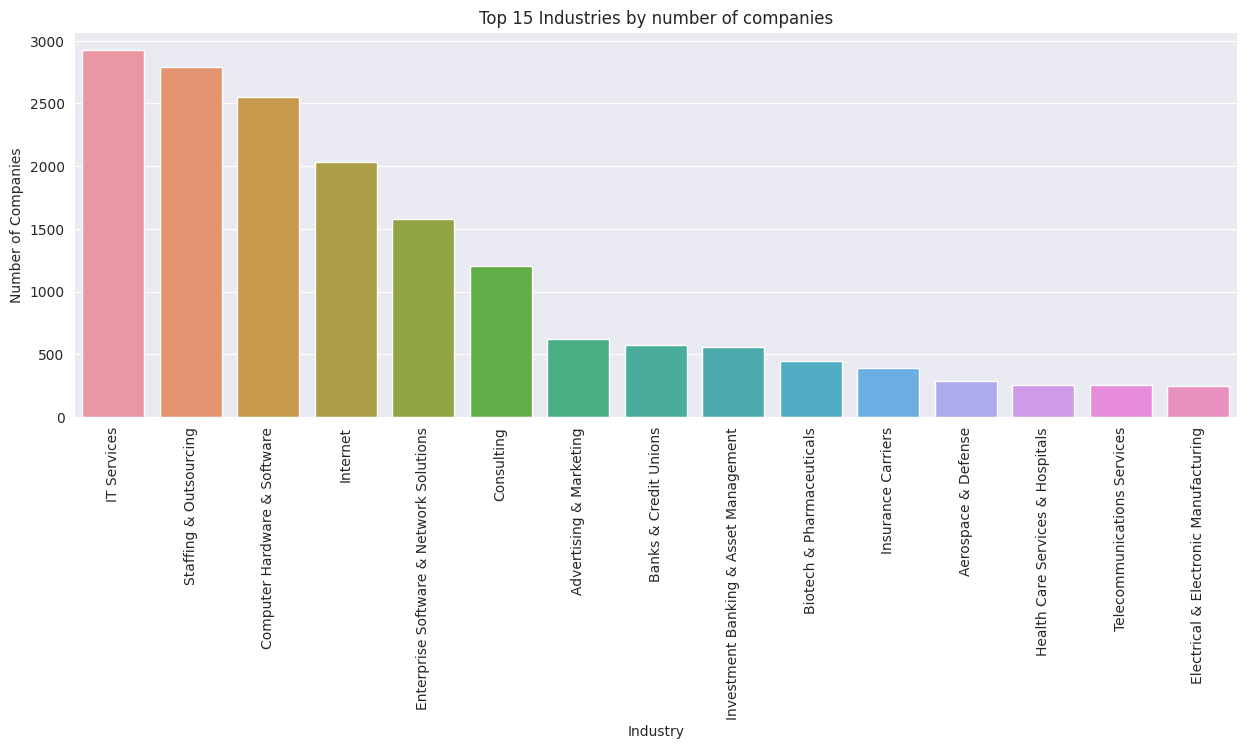

In [82]:
plt.rcParams['figure.figsize'] = (15, 5)

# count the number of job listings for each industry
industry_counts = glass_door['Industry'].value_counts()

# select the top 10 industries
top_15_industries = industry_counts.head(15)

# plot the bar plot
sns.barplot(x=top_15_industries.index, y=top_15_industries.values)

# set the x axis labels to be vertical
plt.xticks(rotation=90)

# Add a label for the x-axis
plt.xlabel('Industry')

# Add a title
plt.title('Top 15 Industries by number of companies')

# Add a label for the y-axis 
plt.ylabel('Number of Companies')

# show the plot
plt.show()



Among the industries analyzed in the dataset, the ones that stand out as having a significant requirement for software engineers are IT Services, Staffing & Outsourcing, and Computer Hardware & Software. These industries demonstrate a prominent role for software engineers in their operations and projects.


Now, let's visualize the `employee size` of the companies to determine where the majority falls: Startups or MNCs.

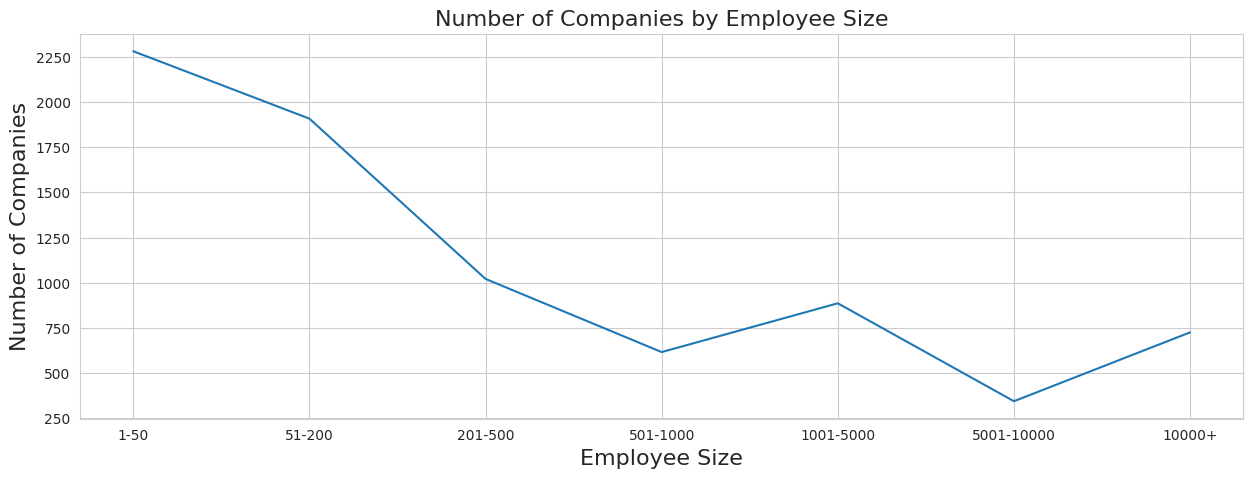

In [102]:
# Set the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# Define the desired order of employee size categories
employee_size_order = ['1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# Calculate the number of unique companies in each employee size category
employee_size_counts = glass_door.groupby(['Employee_Size'])['Company_Name'].nunique()

# Sort the values in the desired order
employee_size_counts = employee_size_counts.loc[employee_size_order]

# Plot a line chart for the employee size counts with the desired x-axis order
employee_size_counts.plot(kind='line')

# Add a title to the plot with a font size of 16
plt.title('Number of Companies by Employee Size', fontsize=16)

# Add a label for the x-axis
plt.xlabel('Employee Size',fontsize = 16)

# Add a label for the y-axis
plt.ylabel('Number of Companies', fontsize = 16)

# Display the plot
plt.show()


The `employee size` categories of "1-50" and "51-200" have the highest number of companies, indicating that startups or small to medium-sized enterprises (SMEs) make up a significant portion of the dataset.

One seeking a job, especially in the engineering field, must not ignore startups as there are a greater number of startups or SMEs compared to MNCs.

Although this does'nt indicate that it's easier to get into startup than an MNC's or vice versa.


Let's examine the top `Sectors` in which the companies are classified.

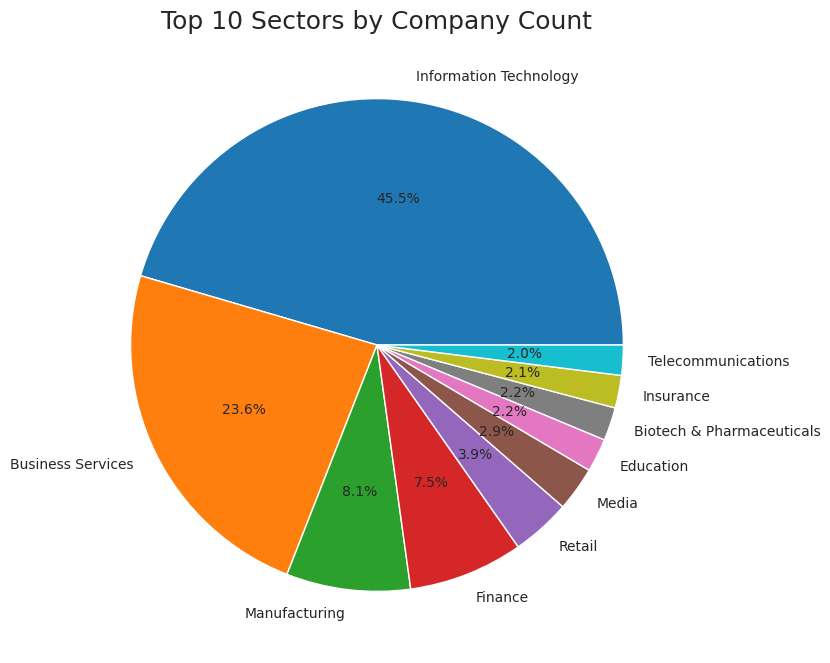

In [110]:
# Set the figure size
plt.rcParams['figure.figsize'] = (16, 8)

# Calculate the number of companies in each sector
sector_counts = glass_door.groupby(['sector'])['Company_Name'].nunique().sort_values(ascending=False)

# Get the top 10 sectors
top10_sectors = sector_counts.head(10)

# Add a title
plt.title('Top 10 Sectors by Company Count',fontsize = 18)

plt.pie(top10_sectors/top10_sectors.sum(),labels = top10_sectors.index.values, autopct='%1.1f%%',textprops={'size':10})



# Show the chart
plt.show()

By looking at the pie chart, we can clearly see that the IT and Business Services sector holds the largest share, accounting for 69.1% of the total.

It's clear that sectors like Telecommunications, Insurance, and Biotech & Pharmaceuticals don't provide as many job opportunities as IT and Business services do. However, it's important to consider that these sectors ultimately provide services to clients who may be in the Telecommunications or Insurance sector.

Let's review the rating column and determine the rating received by companies.



We will create rating bins to categorize the ratings. Ratings between 1 and 2 will be considered as "low," ratings between 2 and 3 as "medium-low," and so on. This categorization will facilitate the plotting process.

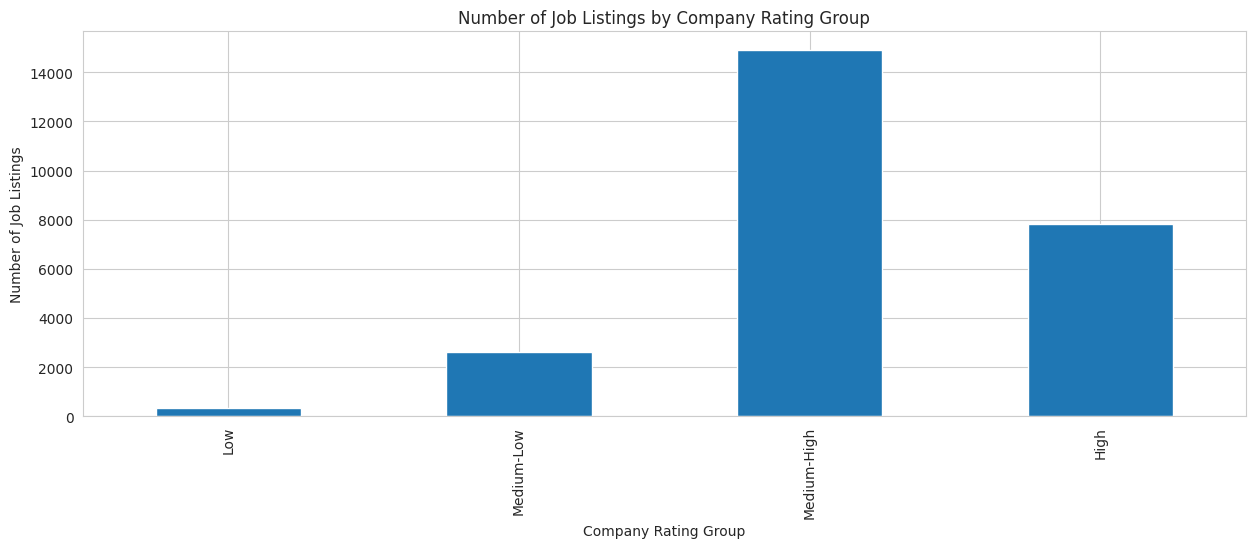

In [111]:
#Get the count of job listings by company rating
counts = glass_door.groupby('Company_Rating')['Job_Title'].count()

#Create a new column that groups the company ratings into bins
glass_door['Rating_Group'] = pd.cut(glass_door['Company_Rating'], bins=[1, 2, 3, 4, 5], labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Set the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# Calculate the number of job listings for each company rating group
counts = glass_door.groupby('Rating_Group')['Job_Title'].count()

# Plot a bar chart for the job listing counts
counts.plot(kind='bar', title='Number of Job Listings by Company Rating Group', figsize=(15, 5), grid=True)

# Add a label for the x-axis
plt.xlabel('Company Rating Group')

# Add a label for the y-axis
plt.ylabel('Number of Job Listings')

# Display the plot
plt.show();


Based on the available information, it appears that a significant portion of the companies have been assigned the rating of "medium-low" and "high." However, it is important to note that we do not have precise details regarding the criteria used for assigning these ratings for the company.

Before we proceed to the question and answer section, let's examine the `Company_Founded_Year` column to determine the year of establishment for each company.

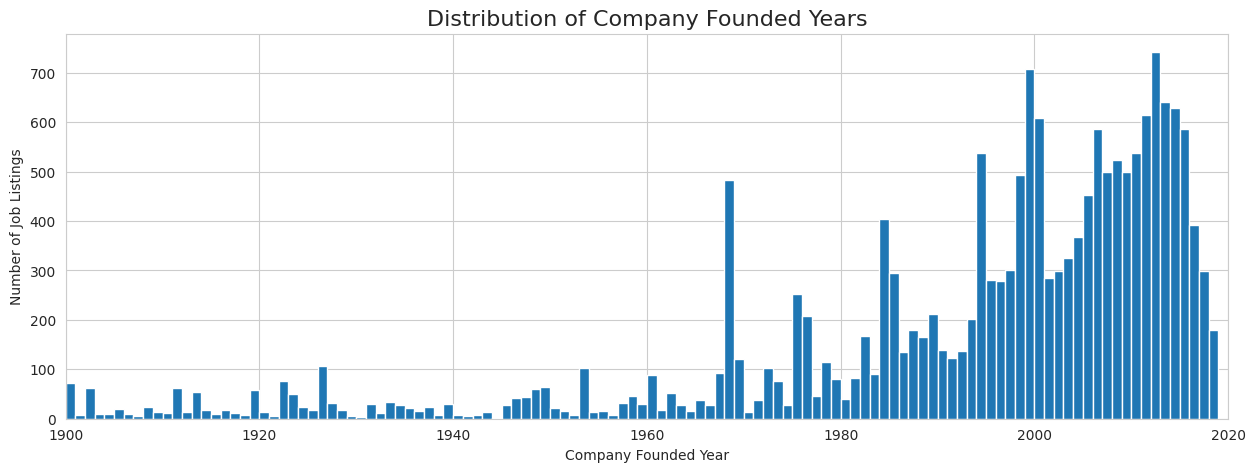

In [112]:
# Set the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot a histogram of the company founded years
plt.hist(glass_door['Company_Founded_Year'], bins=range(1800,2020))

# Add a title to the plot
plt.title('Distribution of Company Founded Years', fontsize=16)

# Add a label for the x-axis
plt.xlabel('Company Founded Year')

# Add a label for the y-axis
plt.ylabel('Number of Job Listings')

# Set the x-axis limits
plt.xlim(1900, 2020)

# Display the plot
plt.show()


As observed, a majority of the companies in the dataset were founded after the 2000s, indicating that they are likely startups. This aligns with our earlier observation that the dataset primarily consists of job listings from startups more than multinational corporations (MNCs).

## Ask & answer questions

Great! Let's narrow down our focus to data science-related jobs in the dataset and proceed with answering the wide range of questions we discussed at the beginning of this project.

 Let's create a separate list for Data Science job roles as `ds_job_title`, and similarly, we'll create another list for other Software job roles as `software_job_title`.

In [87]:
# List containing Data Science Job roles
ds_job_title = ['Database Administrator','Big Data Engineer','Data Engineer','Data Analyst','Data Scientist','Machine Learning Engineer','Business Intelligence Analyst','Data Administrator','Data Mining Engineer','Data Modeler','Data Governance Analyst','Data Visualization Analyst','Predictive Modeler','Statistical Modeler','Data Product Manager','Data Consultant','Data Quality Engineer','Data Wrangler','Data Storyteller','Data Infrastructure Engineer','Data Architect','AI Engineer', 'Artificial Intelligence Engineer','research scientist', 'business analyst','Business Intelligence Developer' , 'statistician','Quantitative Analyst','Research Analyst','Database Analyst','Healthcare Data Analyst', 'Full Stack Machine Learning Engineer', 'deep learning engineer', 'Full Stack Deep Learning Engineer']

# List containing Software Job roles
software_jobtitle = ['Software Engineer','Full Stack Developer','Front-End Developer','Back-End Developer','Software Developer in Test','Cloud Developer','Mobile Developer','Web Developer','Software Architect','Technical Lead','Software Development Manager','Software Project Manager','Software Product Manager','Agile','DevOps Engineer','QA Engineer','Systems Engineer','Network Engineer','Security Engineer']

In [88]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Q1. What are the most common  sectors for data science jobs?

• First, we filter the `Job_Titles` which are relevant to data science using the ds_job_title list.

• Then, we extract the `sector` column from the `glass_door` dataframe for these data science job titles.


• Next, we count the number of occurrences of each sector and find the top 10 most common sectors.


• Finally, we plot a bar chart to visualize the top 10 sectors and their number of job listings.

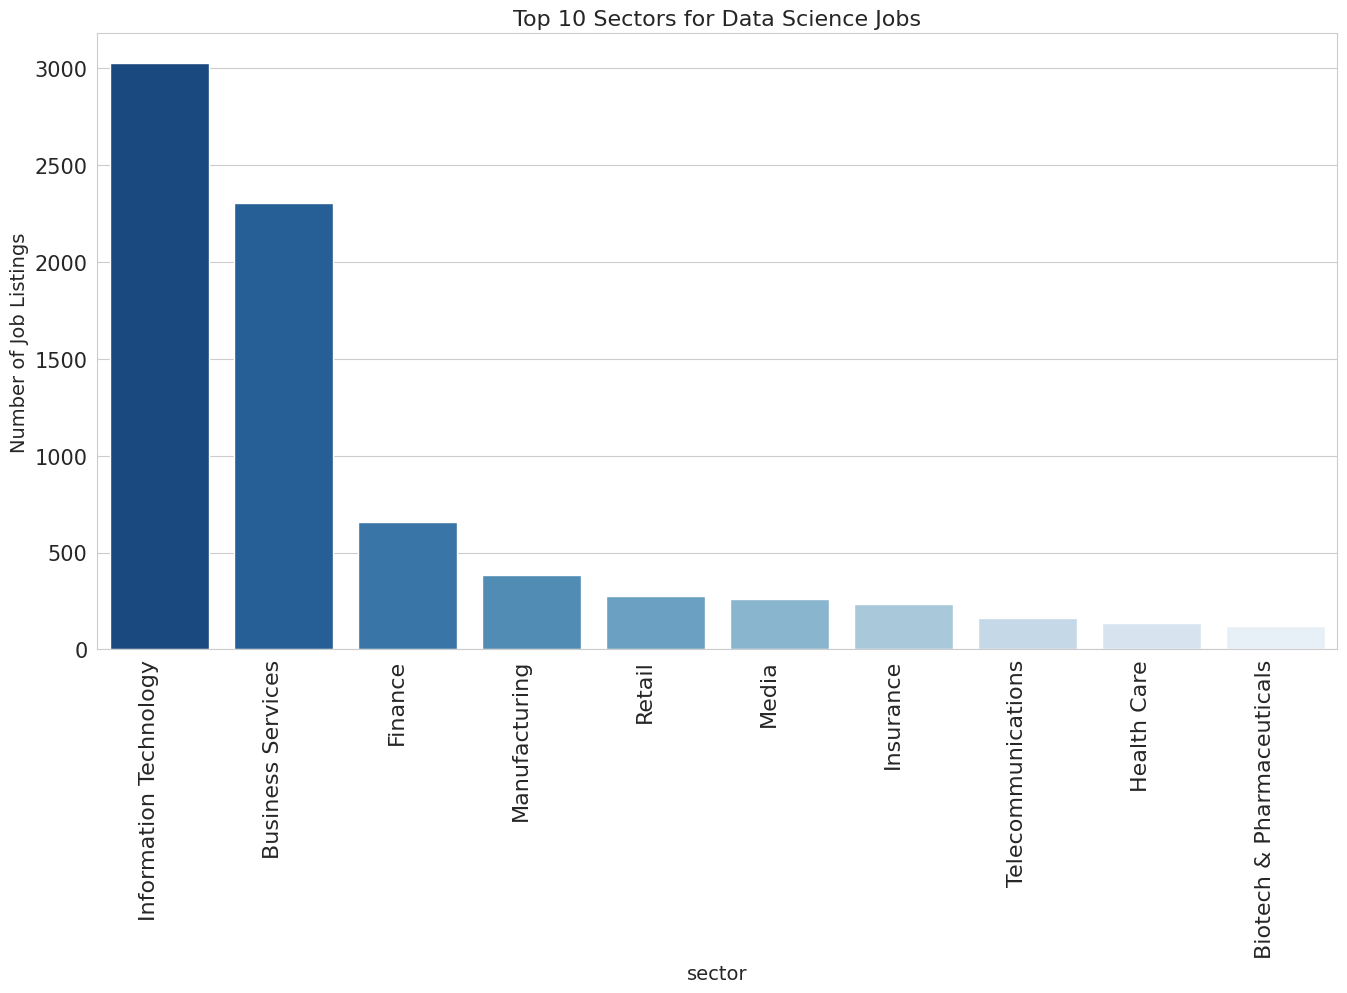

In [89]:
# Filter the glass_door DataFrame to include only the rows where the 'Job_Title' is in the ds_job_title list
top10_industries = glass_door[glass_door['Job_Title'].isin(ds_job_title)]\
                        ['sector'].value_counts().head(10)

# Set the seaborn plot style to 'whitegrid'
sns.set_style('whitegrid')

# Set the figure size
plt.figure(figsize=(16,8)) 

# Plot a bar chart using seaborn's barplot function
sns.barplot(x=top10_industries.index, y=top10_industries.values, palette='Blues_r')

# Add a title to the plot with a font size of 16
plt.title('Top 10 Sectors for Data Science Jobs', fontsize=16)

# Add a label for the x-axis with a font size of 14
plt.xlabel('sector', fontsize=14)

# Add a label for the y-axis with a font size of 14
plt.ylabel('Number of Job Listings', fontsize=14)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90, fontsize=16, ha='right')

# Set the font size of the y-axis labels to 15
plt.yticks(fontsize=15)

# Display the plot
plt.show()


• The most common industries and sectors for data science jobs, based on the provided dataset, are as follows:

Information Technology, Business Services, Finance, Health Care, Education, Manufacturing, Government, Biotech & Pharmaceuticals, Insurance, Retail.


• The above bar chart shows the number of job listings for the top 10 sectors. We can see that Information Technology is the most common industry with the highest number of job listings that is nearly 3000 for data science jobs, followed by Business Services and Finance.









### Q2. What is the average salary for data science jobs?

• Filter the `glass_door` dataset to include only data science job titles as we did before.


• Group the average salary for each data science job title using the `Average_Salary` column.


• Select the top 10 job titles with the highest average salary.


•Plot a bar chart of the top 10 job titles by average salary using the plotly.graph_objects library.

In [90]:
# filter glass_door to include only data science job titles

ds_glass_door = glass_door[glass_door['Job_Title'].isin(ds_job_title)]

# calculate the average salary for each data science job title
avg_salary = ds_glass_door.groupby('Job_Title')['Average_Salary'].mean().sort_values(ascending=False)[:10]

# create bar chart
fig = go.Figure(go.Bar(x=avg_salary.index, y=avg_salary.values, marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])))

# update layout
fig.update_layout(title='Top 10 Data Science Job Titles by Average Salary',
                  xaxis_title='Job_Title',
                  yaxis_title='Average Salary ($)',
                  xaxis_tickangle=-90)

# Display the plot
fig.show()


• The average salary for data science jobs ranges from approximately $84k - 23k depending on the job title. The top 10 job titles with the highest average salary are shown above.

• These job titles are associated with a wide range of industries, including technology, finance, healthcare, and consulting.

### Q3. How has the number of data science job postings changed over time?

• First we filter the `glass_door` dataframe to include only data science jobs using the `ds_job_title list`.


• Next, we convert the Job_Posting_Date column to datetime format using the to_datetime() method in Pandas.


• Then, we group the data by month using the groupby() method and passing in the Job_Posting_Date column as the key and a frequency of 'M' to specify monthly grouping. We then use the count() method to get the count of job postings in each month.

• Finally, we use the px.line() function in Plotly Express to create a line chart with monthly_counts as the input data

In [91]:
# Filter the glass_door dataframe to include only data science jobs
ds_glass_door = glass_door[glass_door['Job_Title'].isin(ds_job_title)]

# Convert date column to datetime format
ds_glass_door['Job_Posting_Date'] = pd.to_datetime(ds_glass_door['Job_Posting_Date'])

# Create a new dataframe with count of job postings per month
monthly_counts = ds_glass_door.groupby(pd.Grouper(key='Job_Posting_Date', freq='M'))['Job_Title'].count().reset_index()
monthly_counts.columns = ['Month', 'Number of Jobs']
monthly_counts['Month'] = monthly_counts['Month'].dt.strftime('%Y-%m')

# Create line chart
fig = px.line(monthly_counts, x='Month', y='Number of Jobs', title='Number of Data Science Job Postings Over Time')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Jobs')
fig.show()


• Based on the graph, we can see that the number of data science job postings has been increasing steadily since March 2019, with a peak in October 2019. This suggests a growing demand for data science skills in the job market.

### Q4. Are data science jobs more prevalent in high or low revenue companies?

• First, we filter the `glass_door` dataframe to only include data science job titles.

• We group the data by revenue category, using the pd.cut() function to create five bins based on revenue amounts, and count the number of job listings in each category.

•Then, we create a pie chart using Plotly Express to display the distribution of data science jobs across revenue categories. We specify the names and values of the chart, as well as custom labels for the x and y axes.



In [92]:
# Filter the data to only include data science job titles
ds_jobs = glass_door[glass_door['Job_Title'].str.lower().isin(ds_job_title)]

# Group the data by revenue category and count the number of job listings
revenue_counts = ds_jobs.groupby(pd.cut(ds_jobs['Revenue'], bins=[0, 50, 500, 5000, 50000, 100000], include_lowest=True, labels=['$ <50M', '$ 50M-500M', '$ 500M-5B', '$ 5B-50B', '$ 50B+']))['Company_Name'].count()

# Create a pie chart to display the distribution of data science jobs across revenue categories
fig = px.pie(names=revenue_counts.index, values=revenue_counts.values, title='Distribution of Data Science Jobs Across Revenue Categories', 
             labels={'names': 'revenue', 'values': 'No. of Companies'}, 
             custom_data=[revenue_counts.values])

# Display the plot
fig.show()


• The pie chart shows that data science jobs are more prevalent in low revenue companies than in high revenue companies.

• The pie chart shows that the majority of data science jobs are found in companies with revenue less than $50 million.



### Q5. What are Top locations for the Data Science jobs?

• First, we filter the `glass_door` dataframe to only include data science job titles.

• Then, we group the data by location and count the number of job listings in each location.

• Finally, we select the top 10 locations with the highest number of job listings and create a seaborn bar plot to display the results.

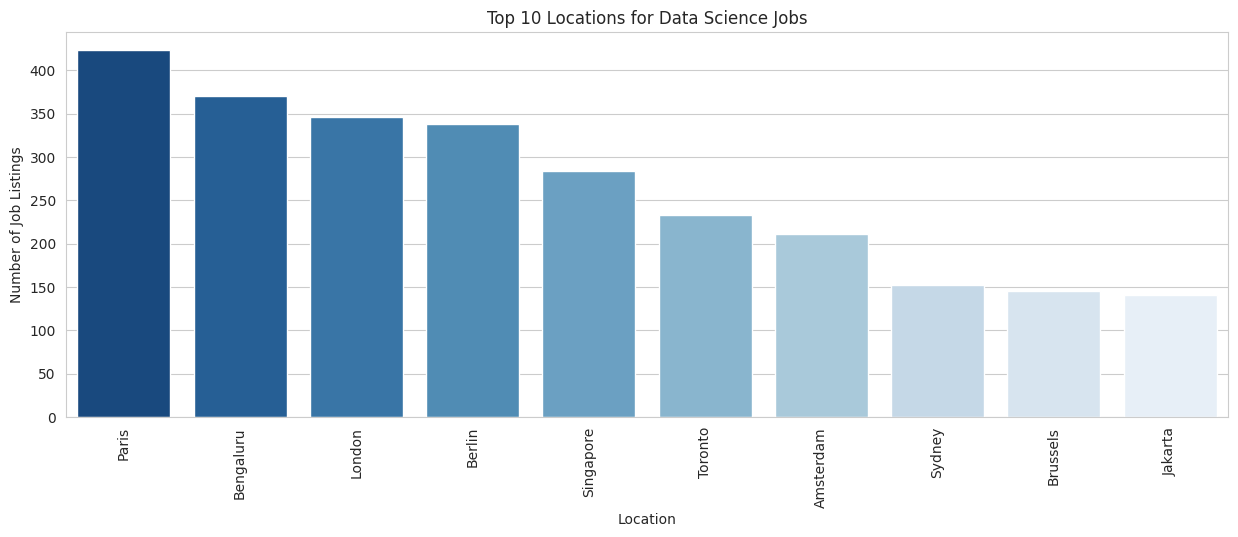

In [93]:
# group the data by location and count the number of job listings for data science job titles
location_counts = glass_door[glass_door['Job_Title'].isin(ds_job_title)].groupby(['Location'])['Company_Name'].count()

# Sort the location counts in descending order and select the top 10 locations
top10_locations = location_counts.sort_values(ascending=False)[:10]

# create a seaborn bar plot to display the top 10 locations
sns.barplot(x=top10_locations.index, y=top10_locations.values, palette='Blues_r')

# Add a title to the plot
plt.title('Top 10 Locations for Data Science Jobs')

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Add a label for the x-axis
plt.xlabel('Location')

# Add a label for the y-axis
plt.ylabel('Number of Job Listings')

# Display the plot
plt.show()

• We found that the top locations for data science jobs include Paris, Bengaluru, London, Berlin, and Singapore.

### Q6. How do the salaries for data science jobs compare across different industries and sectors

• We first filter the data to only include data science job titles. Then, we grouped the data by industry and sector, and calculated the average salary for each group.

• Next, we filter the data to only include the top 20 industries and sectors. Finally, we create a scatter plot to show the average salary for each industry and sector.

In [116]:
# Filter the glass_door DataFrame to include only the rows where the lowercase 'Job_Title' is in the ds_job_title list
ds_jobs = glass_door[glass_door['Job_Title'].str.lower().isin(ds_job_title)]

# Group the data by industry and sector and calculate the average salary
salary_by_industry = ds_jobs.groupby(['Industry', 'sector'])['Average_Salary'].mean().reset_index()

# Get the top 20 industries based on average salary
top_industries = salary_by_industry.groupby('Industry')['Average_Salary'].mean().nlargest(20).reset_index()['Industry']

# Get the top 20 sectors based on average salary
top_sectors = salary_by_industry.groupby('sector')['Average_Salary'].mean().nlargest(20).reset_index()['sector']

# Filter the data to only include the top 20 industries and sectors
salary_by_industry = salary_by_industry[(salary_by_industry['Industry'].isin(top_industries)) & (salary_by_industry['sector'].isin(top_sectors))]

# Create a scatter plot to show the average salary for each industry and sector
fig = px.scatter(salary_by_industry, x='Industry', y='sector', size='Average_Salary', color='Average_Salary', 
                 title='Average Salary for Data Science Jobs by Industry and Sector (Top 20)')

fig.update_layout(xaxis_title='Industry', yaxis_title='sector', height=800)

# Display the plot
fig.show()


• The salaries for data science jobs vary widely across different industries and sectors.

• The plot shows the top 20 industries and sectors based on average salary for data science jobs, where Education and Government sectors has highest average salaries.

### Q7. What are the most common words used in job titles and job descriptions for data science jobs?

• First, we filter the `glass_door` dataframe to only include data science job titles.

• Then, we concatenate all the job descriptions into a single string, use SET function to create stopwords and add any additional stopwords.

• Finally, we plotted the WordCloud using the matplotlib library to display the most common words used in job titles and descriptions for data science jobs.





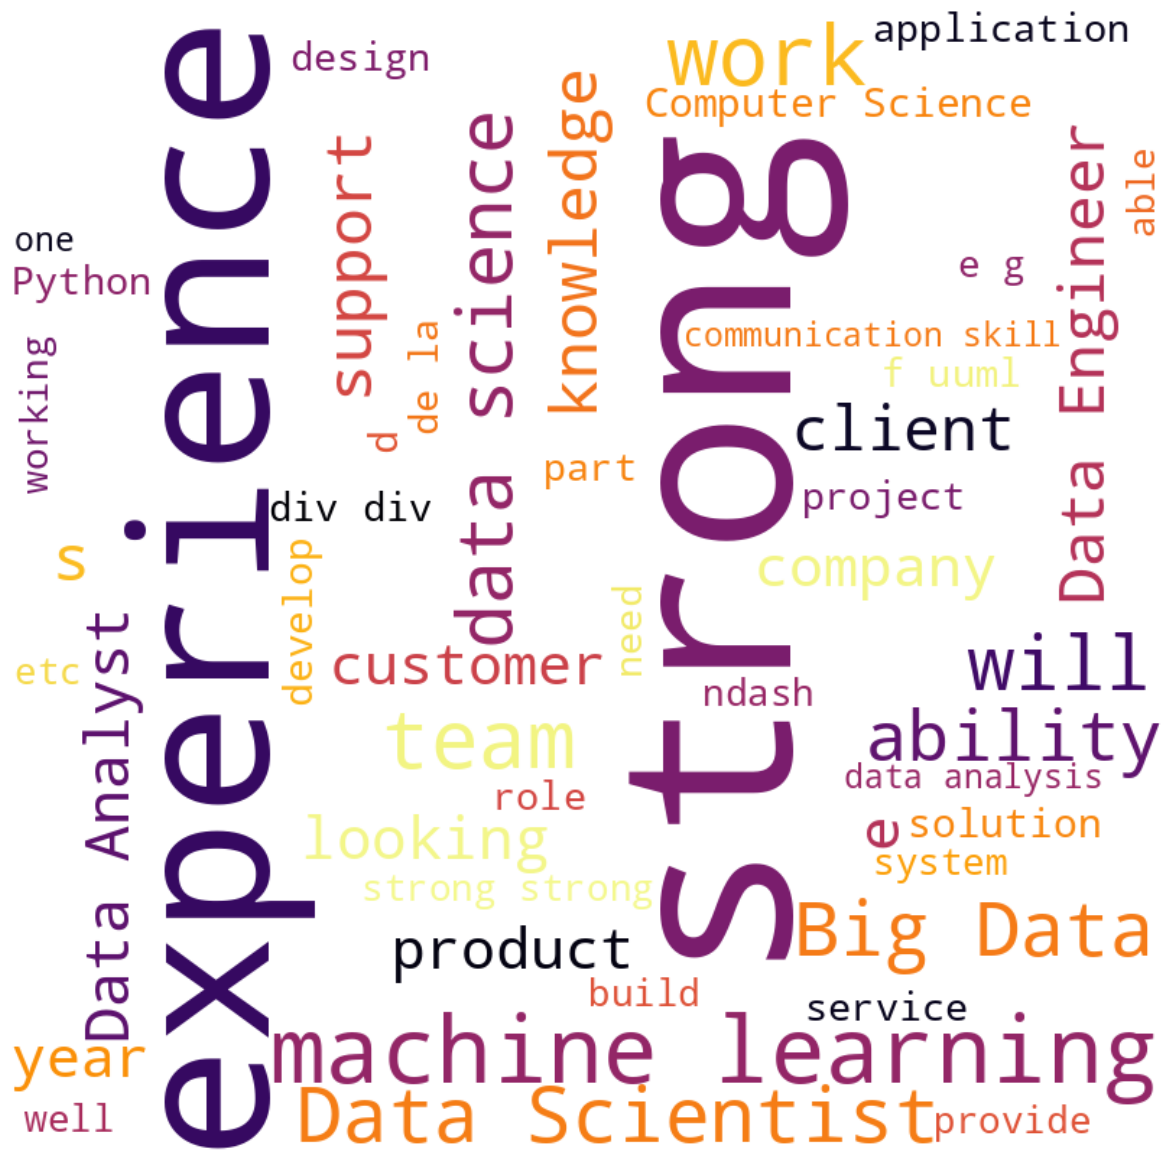

In [95]:
# extract the job descriptions for data science roles
ds_jobs = glass_door.loc[glass_door['Job_Title'].isin(ds_job_title), 'Job_Description']

# concatenate all job descriptions
text = ' '.join(ds_jobs)

# create a set of stopwords
stopwords = set(STOPWORDS)
# add any additional stopwords
stopwords.update(['li', 'ul', 'br', 'rsquo', 'eacute', 'oncute'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', max_words=50, stopwords=stopwords).generate(text)

# plot the word cloud
f =plt.figure()
f.set_figwidth(40)
f.set_figheight(15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the plot
plt.show()


• The approach involved extracting job descriptions for data science roles, concatenating them, and generating a word cloud using the WordCloud library.

• The resulting word cloud displays the most common words used in job titles and job descriptions for data science jobs, with larger words indicating higher frequency of occurrence.

### Q8. What are the top skills that are required for data science roles 

• First, we create a list of skills that are commonly required for data science roles. Then, we create a new column in the dataset that lists the skills mentioned in each job description.

• We then create a dataframe with the skill counts for each job title, and drop skills with no occurrences across all job titles.

• Finally, we create a stacked bar chart that shows the skill counts for each job title.

In [96]:
skills = ['Machine learning', 'Data analysis', 'Python','R','Neural networks', 'Power BI','SAS','Web development','Microsoft Excel', 'DevOps', 'SQL', 'Statistics', 'Cloud Computing', 'Data visualization', 'Big data', 'Deep learning', 'Mathematics', 'Statistical analysis and computing', 'Database Management','Spark','ETL', 'Data warehousing']

# create a new column that lists the skills mentioned in each job description
glass_door['Skills'] = glass_door['Job_Description'].apply(lambda x: [skill for skill in skills if x.lower().find(skill.lower()) != -1])

# create a dataframe with the skill counts for each job title
skill_counts_df = pd.DataFrame(columns=skills)

# Iterate through each data science job title    
for job_title in ds_job_title:

    # Get the skills mentioned in the job descriptions for the current job title
    job_title_skills = glass_door.loc[glass_door['Job_Title'] == job_title, 'Skills'].values

    # If there are skills mentioned, create a Series with 1s for the skills present and 0s for the rest
    if len(job_title_skills) > 0:
        job_title_counts = pd.Series([skill in job_title_skills[0] for skill in skills], index=skills)

        # Add the skill counts for the current job title to the skill_counts_df DataFrame
        skill_counts_df.loc[job_title] = job_title_counts[skill_counts_df.columns].astype(int)

# Drop skills with no occurrences across all job titles
skill_counts_df = skill_counts_df.loc[:, (skill_counts_df != 0).any(axis=0)]

# Create a stacked bar chart to visualize the skill counts for each job title
fig = go.Figure()

# Iterate through each skill and add a stacked bar trace to the figure
for skill in skill_counts_df.columns:
    fig.add_trace(go.Bar(
        x=skill_counts_df.index,
        y=skill_counts_df[skill],
        name=skill
    ))

# Set the layout and display the figure
fig.update_layout(barmode='stack', title='Top Skills for Data Science Roles', xaxis_title='Job Title', yaxis_title='Number of Job Listings')
fig.show()


• The resulting chart shows the top skills required for data science roles across multiple job titles.

• Machine learning and data analysis are the top skills required for data science roles. Other important skills include programming languages like Python and R, as well as knowledge of statistics, data visualization, and database management.


### Q9. How does the number of IT job listings vary between countries?

• First, we group the data by `Country` and count the number of job listings for all IT `Job_Titles`. 

• Then, we create a scatter plot using Plotly Express, with the size and color of markers representing the number of jobs per country, to visualize how the number of IT job listings varies between countries.

In [97]:
# group the data by country and count the number of job listings for all IT job titles
country_counts = glass_door.groupby('Country')['Job_Title'].count().reset_index(name='Counts')

# create a scatter plot using Plotly Express, with the size of markers representing the number of jobs per country
fig = px.scatter_geo(country_counts, locations='Country', locationmode='country names', color='Counts',
                     hover_name='Country', size='Counts', projection='natural earth', title='IT Job Counts by Country')

# Display the plot
fig.show()


• Based on the results, we can see India has the highest number of IT job listings.

### Q10. What are the top job sources for data science job postings?

• First we group the data by job source and count the number of job listings for data science job titles.

• Then, we create a new dataframe with only the top 10 job sources and their corresponding job titles and counts.

• Finally we create a sunburst chart to visualize the top 10 job sources for data science jobs.



In [98]:
# group the data by job source and count the number of job listings for data science job titles
source_counts = glass_door[glass_door['Job_Title'].isin(ds_job_title)].groupby(['Job_Source'])['Company_Name'].count()

# sort the results in descending order and select the top 10
top10_sources = source_counts.sort_values(ascending=False)[:10]

# Filter the glass_door DataFrame to include only the rows with the top 10 job sources
df = glass_door[glass_door['Job_Title'].isin(ds_job_title) & glass_door['Job_Source'].isin(top10_sources.index)]

# Group the data by job source and job title, and calculate the count
source_job_counts = df.groupby(['Job_Source', 'Job_Title']).size().reset_index(name='Counts')

# Create a sunburst chart using Plotly
fig = px.sunburst(source_job_counts, path=['Job_Title', 'Job_Source'], values='Counts', title='Top 10 Job Sources for Data Science Jobs')

# Display the plot
fig.show()


• The top job sources for data science job postings are Indeed, Glassdoor, LinkedIn, ZipRecruiter, and CareerBuilder.

• Among the all Indeed is the top job source, with more than double the number of job listings as the second-ranked source, Glassdoor.

## Summary

This project aimed to gain insights into the data science job market by analyzing data science job postings from Glassdoor. It focused on various aspects such as job titles, locations, salaries, required skills, industries, sectors, and job sources.

The analysis revealed common job titles in the field, with "Data Scientist" being a prominent role. The project also identified the top locations for data science jobs, highlighting cities like Paris, Bengaluru, London, Berlin, and Singapore as major hubs for such opportunities.

Additionally, salary comparisons across different industries and sectors showcased variations in remuneration, with sectors like Education and Government offering higher average salaries for data science roles.

The project delved into the skills required for data science roles and found that machine learning, data analysis, Python, and statistics were among the most sought-after skills.

Furthermore, the study explored job sources, with platforms like Indeed, Glassdoor, LinkedIn, ZipRecruiter, and CareerBuilder emerging as the top sources for data science job postings.

Overall, this project provided valuable insights into the data science job market, shedding light on job titles, locations, salaries, required skills, and job sources. The findings can assist job seekers, employers, and industry professionals in making informed decisions and understanding the landscape of data science opportunities.






## Future work and References


- Exploring Job Satisfaction: In future work, you can analyze job satisfaction data related to data science roles to gain insights into factors that contribute to job satisfaction among professionals in this field. This could involve conducting surveys or analyzing existing datasets on job satisfaction.

- Predictive Modeling: Another avenue for future work is to develop predictive models for predicting job demand and salary trends in the data science industry. This could involve leveraging machine learning algorithms and historical data to forecast future job market dynamics.

- Natural Language Processing: Applying natural language processing techniques to job descriptions can provide deeper insights into the specific skills, qualifications, and responsibilities required for data science roles. This could involve extracting key information, identifying emerging trends, or analyzing the language used in job postings.

1. Jovian Tutorials:

- [Analyzing Tabular Data with Pandas](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/analyzing-tabular-data-with-pandas)
- [Data Visualization with Matplotlib and Seaborn](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/visualization-with-matplotlib-and-seaborn)
- [Advanced Data Analysis Techniques with](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/advanced-data-analysis-techniques)
- [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study)

2. [Kaggle code](https://www.kaggle.com/code/andresionek/is-there-any-job-out-there-kaggle-vs-glassdoor) by Andre Sionek.

3. [Python for Data Analysis](https://wesmckinney.com/book/) by Wes Mckinney